Sigrid's testing markdown

In [3]:
# Import relevant libraries
import os #computer stuff
import numpy as np
import matplotlib.pyplot as plt #plots
import pandas as pd #to work with datasets
from zipfile import ZipFile
import os.path as op

import mne
import mne_nirs

# Import StatsModels
import statsmodels.formula.api as smf
import tqdm


from mne_nirs.experimental_design import make_first_level_design_matrix #making design matrices
from mne_nirs.statistics import run_glm #making ocntrasts
from mne_nirs.statistics import statsmodels_to_results
from mne_nirs.visualisation import plot_glm_group_topo
from mne_nirs.visualisation import plot_glm_surface_projection
from mne_nirs.channels import (get_long_channels, 
                               get_short_channels,
                               picks_pair_to_idx) 
from mne.preprocessing.nirs import optical_density, beer_lambert_law

from nilearn.plotting import plot_design_matrix #another project before mne nirs, they are using it for plotting design matrices

from itertools import compress #for loops, iterations in general
from icecream import ic #like "print"

# Import MNE-BIDS processing
from mne_bids import BIDSPath, read_raw_bids, get_entity_vals

import matplotlib as mpl
from lets_plot import *
LetsPlot.setup_html()

from plotnine import ggplot, aes, geom_line, geom_point, facet_grid, geom_hline
import surfer

print('packages have been imported')

/Users/sigridagersnapbomnielsen/opt/anaconda3/lib/python3.9/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "
/Users/sigridagersnapbomnielsen/opt/anaconda3/lib/python3.9/site-packages/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '


packages have been imported


In [ ]:
# General info
mne._version
mne.sys_info()

Testing function from here: https://mne.tools/stable/auto_tutorials/preprocessing/70_fnirs_processing.html 

also something from here: https://mne.tools/dev/auto_tutorials/intro/10_overview.html

# Loading data

In [82]:
# list files 

# one file
#sub = "/Users/sigridagersnapbomnielsen/Documents/Python/5th_semester/BA_fnirs_code/BA_fNIRS/phase_2_data/NCPE-2021-11-01/NP-Ph2-303-2021-11-01/2021-11-01_001.snirf"
sub = "/Users/sigridagersnapbomnielsen/Documents/Python/5th_semester/BA_fnirs_code/BA_fNIRS/phase_2_data/NCPE-2021-11-01/NP-Ph2-304-2021-11-01/2021-11-01_002.snirf"
# choosing a file which has one of the first source-detector pairs as a bad channel - easier when plotting and inspecting

#three files
#subjects = [
  #  "/Users/sigridagersnapbomnielsen/Documents/Python/5th_semester/BA_fnirs_code/BA_fNIRS/phase_2_data/NCPE-2021-11-01/NP-Ph2-303-2021-11-01/2021-11-01_001.snirf",
   # "/Users/sigridagersnapbomnielsen/Documents/Python/5th_semester/BA_fnirs_code/BA_fNIRS/phase_2_data/NCPE-2021-11-01/NP-Ph2-304-2021-11-01/2021-11-01_002.snirf",
    #"/Users/sigridagersnapbomnielsen/Documents/Python/5th_semester/BA_fnirs_code/BA_fNIRS/phase_2_data/NCPE-2021-11-01/NP-Ph2-305-2021-11-01/2021-11-01_003.snirf"
#]

# all files
subjects = [
    "/Users/sigridagersnapbomnielsen/Documents/Python/5th_semester/BA_fnirs_code/BA_fNIRS/phase_2_data/NCPE-2021-11-01/NP-Ph2-303-2021-11-01/2021-11-01_001.snirf",
    "/Users/sigridagersnapbomnielsen/Documents/Python/5th_semester/BA_fnirs_code/BA_fNIRS/phase_2_data/NCPE-2021-11-01/NP-Ph2-304-2021-11-01/2021-11-01_002.snirf",
    "/Users/sigridagersnapbomnielsen/Documents/Python/5th_semester/BA_fnirs_code/BA_fNIRS/phase_2_data/NCPE-2021-11-01/NP-Ph2-305-2021-11-01/2021-11-01_003.snirf",
    "/Users/sigridagersnapbomnielsen/Documents/Python/5th_semester/BA_fnirs_code/BA_fNIRS/phase_2_data/NCPE-2021-11-04/NP-Ph2-124-2021-11-04/2021-11-04_004.snirf",
    "/Users/sigridagersnapbomnielsen/Documents/Python/5th_semester/BA_fnirs_code/BA_fNIRS/phase_2_data/NCPE-2021-11-04/NP-Ph2-200-2021-11-04/2021-11-04_003.snirf",
    "/Users/sigridagersnapbomnielsen/Documents/Python/5th_semester/BA_fnirs_code/BA_fNIRS/phase_2_data/NCPE-2021-11-04/NP-Ph2-201-2021-11-04/2021-11-04_002.snirf",
    "/Users/sigridagersnapbomnielsen/Documents/Python/5th_semester/BA_fnirs_code/BA_fNIRS/phase_2_data/NCPE-2021-11-04/NP-Ph2-306-2021-11-04/2021-11-04_001.snirf",
    "/Users/sigridagersnapbomnielsen/Documents/Python/5th_semester/BA_fnirs_code/BA_fNIRS/phase_2_data/NCPE-2021-11-08/NP-Ph2-118-2021-11-08/2021-11-08_003.snirf",
    "/Users/sigridagersnapbomnielsen/Documents/Python/5th_semester/BA_fnirs_code/BA_fNIRS/phase_2_data/NCPE-2021-11-08/NP-Ph2-129-2021-11-08/2021-11-08_001.snirf",
    "/Users/sigridagersnapbomnielsen/Documents/Python/5th_semester/BA_fnirs_code/BA_fNIRS/phase_2_data/NCPE-2021-11-08/NP-Ph2-400-2021-11-08/2021-11-08_002.snirf",
    "/Users/sigridagersnapbomnielsen/Documents/Python/5th_semester/BA_fnirs_code/BA_fNIRS/phase_2_data/NCPE-2021-11-11/NP-Ph2-119-2021-11-11/2021-11-11_001.snirf",
    "/Users/sigridagersnapbomnielsen/Documents/Python/5th_semester/BA_fnirs_code/BA_fNIRS/phase_2_data/NCPE-2021-11-11/NP-Ph2-123-2021-11-11/2021-11-11_001.snirf",
    "/Users/sigridagersnapbomnielsen/Documents/Python/5th_semester/BA_fnirs_code/BA_fNIRS/phase_2_data/NCPE-2021-11-11/NP-Ph2-402-2021-11-11/2021-11-11_002.snirf",
    "/Users/sigridagersnapbomnielsen/Documents/Python/5th_semester/BA_fnirs_code/BA_fNIRS/phase_2_data/NCPE-2021-11-15/NP-Ph2-203-2021-11-15/2021-11-15_002.snirf",
    "/Users/sigridagersnapbomnielsen/Documents/Python/5th_semester/BA_fnirs_code/BA_fNIRS/phase_2_data/NCPE-2021-11-15/NP-Ph2-204-2021-11-15/2021-11-15_003.snirf",
    "/Users/sigridagersnapbomnielsen/Documents/Python/5th_semester/BA_fnirs_code/BA_fNIRS/phase_2_data/NCPE-2021-11-15/NP-Ph2-300-2021-11-15/2021-11-15_001.snirf",
    "/Users/sigridagersnapbomnielsen/Documents/Python/5th_semester/BA_fnirs_code/BA_fNIRS/phase_2_data/NP-Ph2-112-2021-10-14/2021-10-14_002.snirf",
    "/Users/sigridagersnapbomnielsen/Documents/Python/5th_semester/BA_fnirs_code/BA_fNIRS/phase_2_data/NP-Ph2-122-2021-10-21/2021-10-21_002.snirf",
    "/Users/sigridagersnapbomnielsen/Documents/Python/5th_semester/BA_fnirs_code/BA_fNIRS/phase_2_data/NP-Ph2-125-2021-10-21/2021-10-21_002.snirf",
    "/Users/sigridagersnapbomnielsen/Documents/Python/5th_semester/BA_fnirs_code/BA_fNIRS/phase_2_data/NP-Ph2-206-2021-11-18/2021-11-18_001.snirf",
    "/Users/sigridagersnapbomnielsen/Documents/Python/5th_semester/BA_fnirs_code/BA_fNIRS/phase_2_data/NP-Ph2-302-2021-10-28/2021-10-28_002.snirf"
]

# SCI function
First order of business - check SCI for all subjects

Objective: Make a for loop which loops over all subjects and spits out a dataframe with 2 columns and 21 rows; the columns are selected by SCI bad channels and number of channels. 

Quality assessment of channels with SCI of .2 (liberal)

In [27]:
# creating empty dataframe
df_sci = pd.DataFrame(columns=['bad_cha', 'bad_no'])

# write function
def sci_preprocess(sub, idx):

    # importing file
    raw = mne.io.read_raw_snirf(sub, optode_frame="mri")

    #renaming triggers
    raw.annotations.rename({'70': 'Visual',
                            '71': 'Visual',
                            '72': 'Visual',
                            '61': 'Auditory',
                            '62': 'Auditory', 
                            '63': 'Auditory'})

    # choosing long channels
    #picks = mne.pick_types(raw.info, meg=False, fnirs=True)
    #dists = mne.preprocessing.nirs.source_detector_distances(
    #    raw.info, picks=picks)
    #raw.pick(picks[dists > 0.01])

    # converting to optical density
    raw_od = mne.preprocessing.nirs.optical_density(raw)

    # creating SCI
    sci = mne.preprocessing.nirs.scalp_coupling_index(raw_od)

    # naming 'bad channels'
    raw_od.info['bads'] = list(compress(raw_od.ch_names, sci < 0.2))

    # plot SCI per participant
    fig, ax = plt.subplots()
    ax.hist(sci)
    ax.set(xlabel='Scalp Coupling Index', ylabel='Count', title = "Subject %d" % idx, xlim=[0, 1])

    # save each figure with a meaningful filename
    #print('%d_sci.pdf' % idx)
    plt.savefig('figures_sci_long_short/%d_sci.pdf' % idx)

    # getting a list of bad channels
    bad_cha = (raw_od.info['bads'])  

    # count them
    bad_no = len(raw_od.info['bads'])

    return bad_cha, bad_no

Loading /Users/sigridagersnapbomnielsen/Documents/Python/5th_semester/BA_fnirs_code/BA_fNIRS/phase_2_data/NCPE-2021-11-01/NP-Ph2-303-2021-11-01/2021-11-01_001.snirf
Reading 0 ... 8022  =      0.000 ...  2102.566 secs...
Loading /Users/sigridagersnapbomnielsen/Documents/Python/5th_semester/BA_fnirs_code/BA_fNIRS/phase_2_data/NCPE-2021-11-01/NP-Ph2-304-2021-11-01/2021-11-01_002.snirf
Reading 0 ... 6905  =      0.000 ...  1809.800 secs...
Loading /Users/sigridagersnapbomnielsen/Documents/Python/5th_semester/BA_fnirs_code/BA_fNIRS/phase_2_data/NCPE-2021-11-01/NP-Ph2-305-2021-11-01/2021-11-01_003.snirf
Reading 0 ... 7746  =      0.000 ...  2030.227 secs...
Loading /Users/sigridagersnapbomnielsen/Documents/Python/5th_semester/BA_fnirs_code/BA_fNIRS/phase_2_data/NCPE-2021-11-04/NP-Ph2-124-2021-11-04/2021-11-04_004.snirf
Reading 0 ... 8929  =      0.000 ...  2340.291 secs...
Loading /Users/sigridagersnapbomnielsen/Documents/Python/5th_semester/BA_fnirs_code/BA_fNIRS/phase_2_data/NCPE-2021-11-0

/var/folders/b0/t62rjb510wb79fxb5ch9n3kc0000gn/T/ipykernel_45218/352413345.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


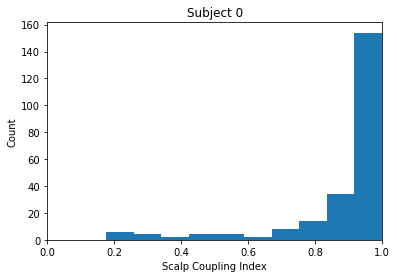

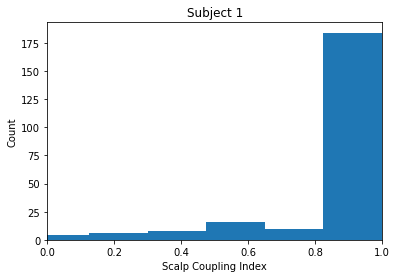

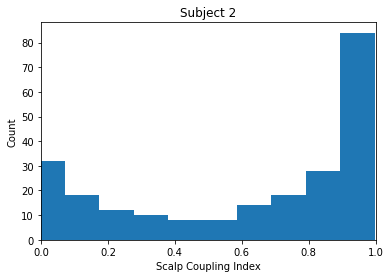

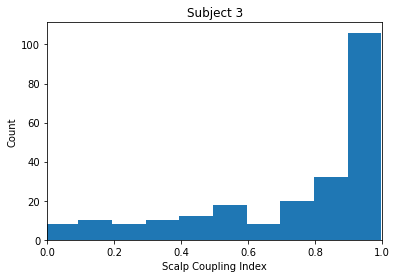

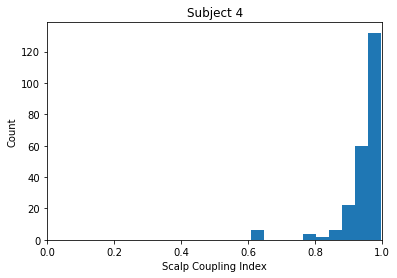

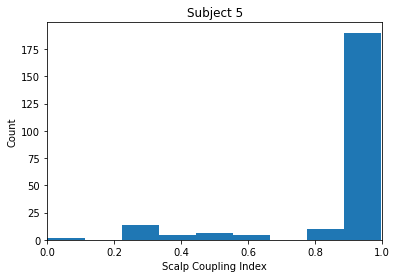

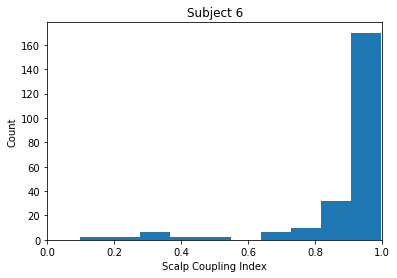

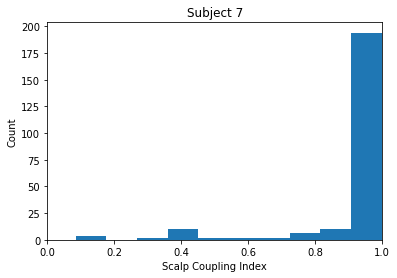

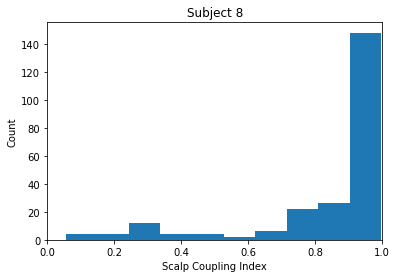

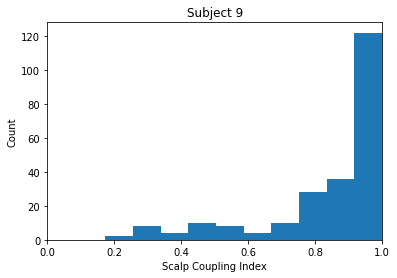

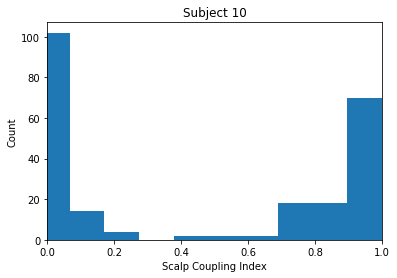

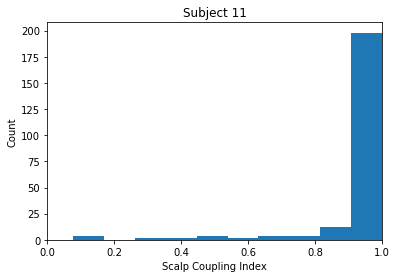

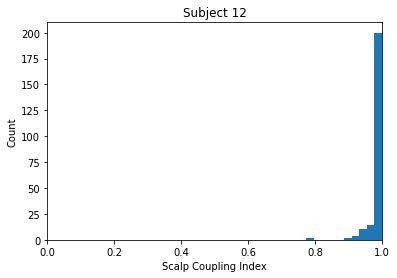

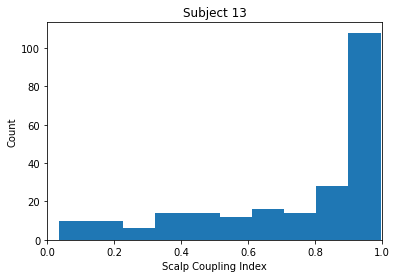

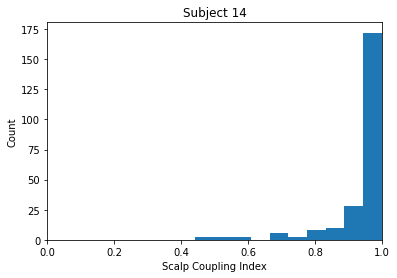

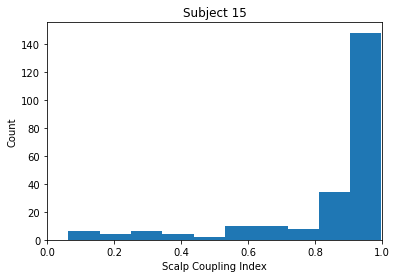

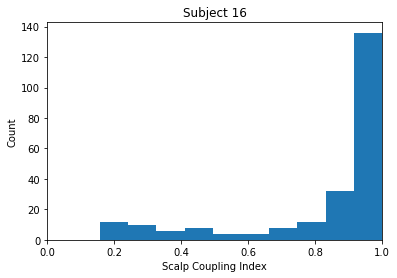

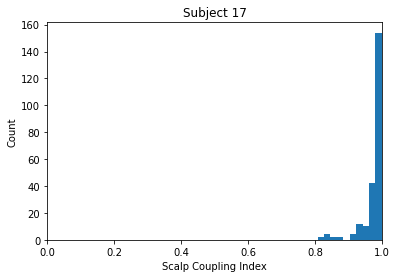

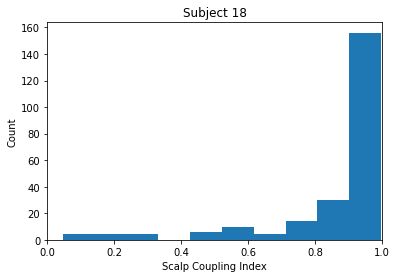

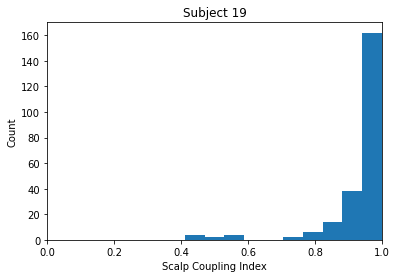

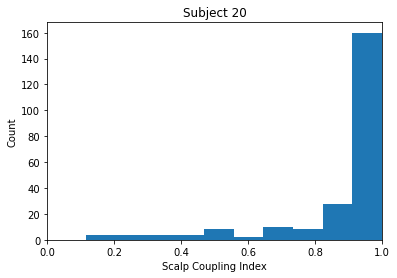

In [28]:
# create empty lists
bad_cha_list = []
bad_no_list = []

# for loop through the list of subjects
for index, sub in enumerate(subjects):
    # calculate SCI for all subjects and return a df with bad channels and number of bad channels
    bad_cha, bad_no = sci_preprocess(
        sub, index
    )

    bad_no_list.append(bad_no)
    bad_cha_list.append(bad_cha)


# put it in a dataframe
df_sci = pd.DataFrame(list(zip(bad_cha_list, bad_no_list)), columns = ["bad_cha", "bad_no"])


## Inspect data after SCI function

In [29]:
#print(df_sci)
df_sci.size

# getting stats before removing any subjects
np.average(df_sci["bad_no"]) # mean 12.01 bad channels per subject (out of 100 something, put in percentage)
np.min(df_sci["bad_no"]) # 0
np.max(df_sci["bad_no"]) # 114
np.std(df_sci["bad_no"]) # 24.82

# after removing short-channels (32), each subject has 200 channels
# We don't want subjects that have more than 10% bad channels (so that'd be more than 20 bad channels)


26.146976863357846

In [30]:
df_sci

bad_cha  bad_no
0   [S22_D19 760, S22_D19 850, S26_D24 760, S26_D2...       4
1   [S1_D2 760, S1_D2 850, S14_D11 760, S14_D11 85...      12
2   [S2_D4 760, S2_D4 850, S3_D4 760, S3_D4 850, S...      54
3   [S8_D3 760, S8_D3 850, S12_D7 760, S12_D7 850,...      18
4                                                  []       0
5   [S12_D7 760, S12_D7 850, S32_D46 760, S32_D46 ...       4
6                              [S8_D3 760, S8_D3 850]       2
7    [S3_D4 760, S3_D4 850, S28_D27 760, S28_D27 850]       4
8   [S3_D4 760, S3_D4 850, S21_D18 760, S21_D18 85...       8
9                          [S31_D16 760, S31_D16 850]       2
10  [S3_D4 760, S3_D4 850, S4_D4 760, S4_D4 850, S...     118
11  [S10_D7 760, S10_D7 850, S26_D26 760, S26_D26 ...       4
12                                                 []       0
13  [S3_D4 760, S3_D4 850, S8_D3 760, S8_D3 850, S...      16
14                                                 []       0
15  [S16_D15 760, S16_D15 850, S28_D27 760, S28_D2...       6
16  [S13_D12 760, S13_D12 850, S15_D12 760, S15_D1...       8
17                                                 []       0
18  [S3_D4 760, S3_D4 850, S17_D2 760, S17_D2 850,...       8
19                                                 []       0
20  [S28_D27 760, S28_D27 850, S31_D16 760, S31_D1...       4

In [31]:
# removing subject 2 (46 bad channels) and subject 10 (114 bad channels)
df_sci.drop([2, 10], axis = 0, inplace = True)

#check that it worked
print(df_sci)

                                              bad_cha  bad_no
0   [S22_D19 760, S22_D19 850, S26_D24 760, S26_D2...       4
1   [S1_D2 760, S1_D2 850, S14_D11 760, S14_D11 85...      12
3   [S8_D3 760, S8_D3 850, S12_D7 760, S12_D7 850,...      18
4                                                  []       0
5   [S12_D7 760, S12_D7 850, S32_D46 760, S32_D46 ...       4
6                              [S8_D3 760, S8_D3 850]       2
7    [S3_D4 760, S3_D4 850, S28_D27 760, S28_D27 850]       4
8   [S3_D4 760, S3_D4 850, S21_D18 760, S21_D18 85...       8
9                          [S31_D16 760, S31_D16 850]       2
11  [S10_D7 760, S10_D7 850, S26_D26 760, S26_D26 ...       4
12                                                 []       0
13  [S3_D4 760, S3_D4 850, S8_D3 760, S8_D3 850, S...      16
14                                                 []       0
15  [S16_D15 760, S16_D15 850, S28_D27 760, S28_D2...       6
16  [S13_D12 760, S13_D12 850, S15_D12 760, S15_D1...       8
17      

In [39]:
# getting new stats
np.average(df_sci["bad_no"])
np.min(df_sci["bad_no"]) 
np.max(df_sci["bad_no"]) 
np.std(df_sci["bad_no"]) 

5.199616435885672

## Stats before removing any subjects
Subject 10 had 114 bad channels (put in percentage out of total)

Average bad channels per subject: 12.01
Min: 0 
Max: 114
Standard deviation: 24.82

## Stats after removing subject 10 and subject 2 - only long-channels
10 % = 20 channels 
Average bad channels per subject: 4.95
Min: 0 
Max: 16 (less than 10%)
Standard deviation: 4.78

## Stats after removing subject 10 and subject 2 - BOTH short- and long-channels
10 % = 23 channels 
Average bad channels per subject: 5.26
Min: 0
Max: 18 (less than 10%)
Standard deviation: 5.20



# Checking the threshold of .2 or .5 
The above mentioned values are for the liberal threshold of .2.

When running the code with a more conservative threshold of .5, I find that 48% of the subjects (10 out of 21) have more than 10% bad channels (>20 bad channels). Given the amount of data (or lack of) I'll continue with a threshold of .2.

## Channel pruning
Now, we need to figure if some channels are inherently bad. They will be removed from the data set. 

In [50]:
# count number of times each bad channel occurs
counts = {}
for row in df_sci["bad_cha"]:
    for channel in row:
        if channel in counts:
            counts[channel] += 1
        else:
            counts[channel] = 1

# sort it in descending order
sorted_counts = sorted(counts.items(), key=lambda item: -item[1])

print(sorted_counts)
print(len(sorted_counts))

[('S3_D4 760', 4), ('S3_D4 850', 4), ('S26_D24 760', 3), ('S26_D24 850', 3), ('S31_D16 760', 3), ('S31_D16 850', 3), ('S8_D3 760', 3), ('S8_D3 850', 3), ('S21_D18 760', 3), ('S21_D18 850', 3), ('S28_D27 760', 3), ('S28_D27 850', 3), ('S26_D26 760', 3), ('S26_D26 850', 3), ('S12_D7 760', 2), ('S12_D7 850', 2), ('S17_D19 760', 2), ('S17_D19 850', 2), ('S32_D29 760', 2), ('S32_D29 850', 2), ('S32_D46 760', 2), ('S32_D46 850', 2), ('S22_D19 760', 1), ('S22_D19 850', 1), ('S1_D2 760', 1), ('S1_D2 850', 1), ('S14_D11 760', 1), ('S14_D11 850', 1), ('S15_D14 760', 1), ('S15_D14 850', 1), ('S22_D21 760', 1), ('S22_D21 850', 1), ('S24_D25 760', 1), ('S24_D25 850', 1), ('S13_D37 760', 1), ('S13_D37 850', 1), ('S28_D25 760', 1), ('S28_D25 850', 1), ('S28_D29 760', 1), ('S28_D29 850', 1), ('S10_D7 760', 1), ('S10_D7 850', 1), ('S8_D7 760', 1), ('S8_D7 850', 1), ('S11_D9 760', 1), ('S11_D9 850', 1), ('S23_D24 760', 1), ('S23_D24 850', 1), ('S25_D24 760', 1), ('S25_D24 850', 1), ('S16_D15 760', 1), (

# Thoughts on number of bad channels
58 bad channels across 19 participants is more than 25% of all channels. So we can definitely not remove all bad channels for all subjects. This would also be problematic when analyzing data. 
Also, as a channel is at most bad for 4 out of 19 subjects, I don't think we should remove any channels for all subjects. 
We also probably should not remove the bad channels for each participant, as it messes up the analysis (different number of channels per subject).

I am wondering if MNE-python might be able to deal with this, as it wouldn't make sense to include SCI in the first place if the analysis can only run on the same number of channels per subject..
Also, SCI doesn't remove any channels. We have the same number of channels before and after applying SCI. 

Maybe we could solve this by getting an average amount of activitation per ROI (multiple channels) and then make the model work with that? (interpolation of some sort). 

Now, we need to figure out what to do with the bad channels / what and if MNE-NIRS does anything to the bad channels besides labelling them as 'bad'. 

# Checking if there is actually default interpolation going on 
- Will the plot change? Answer: the bad channels are only marked in the plot, they haven't changed besides that. 
- Will Esben's code run on a dataset with and without doing SCI? (see other markdown)

In [56]:
# reading the file
raw = mne.io.read_raw_snirf(sub, optode_frame="mri")

    #renaming triggers
raw.annotations.rename({'70': 'Visual',
                        '71': 'Visual',
                        '72': 'Visual',
                        '61': 'Auditory',
                        '62': 'Auditory', 
                        '63': 'Auditory'})


print(len(raw.info['ch_names']))
raw.info['ch_names']
# 232 channels before removing them

Loading /Users/sigridagersnapbomnielsen/Documents/Python/5th_semester/BA_fnirs_code/BA_fNIRS/phase_2_data/NP-Ph2-302-2021-10-28/2021-10-28_002.snirf
232


['S1_D1 760',
 'S1_D1 850',
 'S1_D2 760',
 'S1_D2 850',
 'S1_D17 760',
 'S1_D17 850',
 'S2_D1 760',
 'S2_D1 850',
 'S2_D4 760',
 'S2_D4 850',
 'S3_D1 760',
 'S3_D1 850',
 'S3_D2 760',
 'S3_D2 850',
 'S3_D4 760',
 'S3_D4 850',
 'S3_D31 760',
 'S3_D31 850',
 'S4_D4 760',
 'S4_D4 850',
 'S4_D6 760',
 'S4_D6 850',
 'S4_D32 760',
 'S4_D32 850',
 'S5_D3 760',
 'S5_D3 850',
 'S5_D4 760',
 'S5_D4 850',
 'S5_D5 760',
 'S5_D5 850',
 'S6_D2 760',
 'S6_D2 850',
 'S6_D3 760',
 'S6_D3 850',
 'S6_D18 760',
 'S6_D18 850',
 'S7_D4 760',
 'S7_D4 850',
 'S7_D5 760',
 'S7_D5 850',
 'S7_D6 760',
 'S7_D6 850',
 'S7_D8 760',
 'S7_D8 850',
 'S7_D33 760',
 'S7_D33 850',
 'S8_D3 760',
 'S8_D3 850',
 'S8_D5 760',
 'S8_D5 850',
 'S8_D7 760',
 'S8_D7 850',
 'S8_D34 760',
 'S8_D34 850',
 'S9_D6 760',
 'S9_D6 850',
 'S9_D8 760',
 'S9_D8 850',
 'S9_D10 760',
 'S9_D10 850',
 'S10_D5 760',
 'S10_D5 850',
 'S10_D7 760',
 'S10_D7 850',
 'S10_D8 760',
 'S10_D8 850',
 'S10_D9 760',
 'S10_D9 850',
 'S11_D8 760',
 'S11_D8 85

In [55]:
get_short_channels(raw)

Reading 0 ... 10537  =      0.000 ...  2761.748 secs...


<RawSNIRF | 2021-10-28_002.snirf, 32 x 10538 (2761.7 s), ~2.7 MB, data loaded>

In [6]:
##### SKIP THIS STEP IF YOU WANT BOTH LONG- AND SHORT-CHANNELS
# choosing long channels
picks = mne.pick_types(raw.info, meg=False, fnirs=True)
dists = mne.preprocessing.nirs.source_detector_distances(
    raw.info, picks=picks)
raw.pick(picks[dists > 0.01])

print(len(raw.info['ch_names']))

# now we have 200 channels 
# 32 short-channels have been removed

200


In [57]:
# converting to optical density
raw_od = mne.preprocessing.nirs.optical_density(raw)

Reading 0 ... 10537  =      0.000 ...  2761.748 secs...


Using matplotlib as 2D backend.


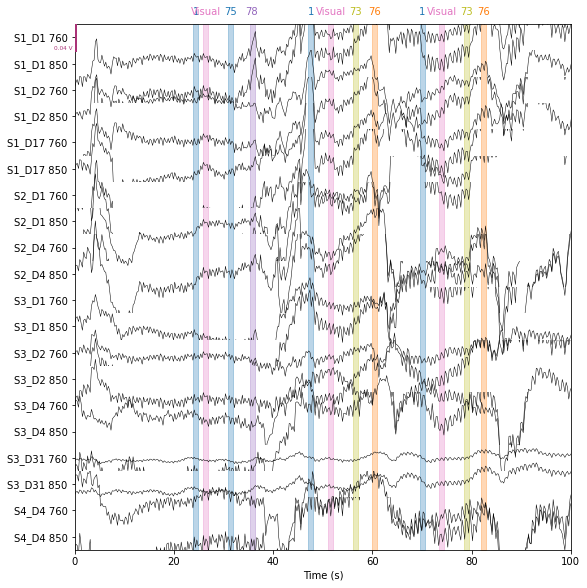

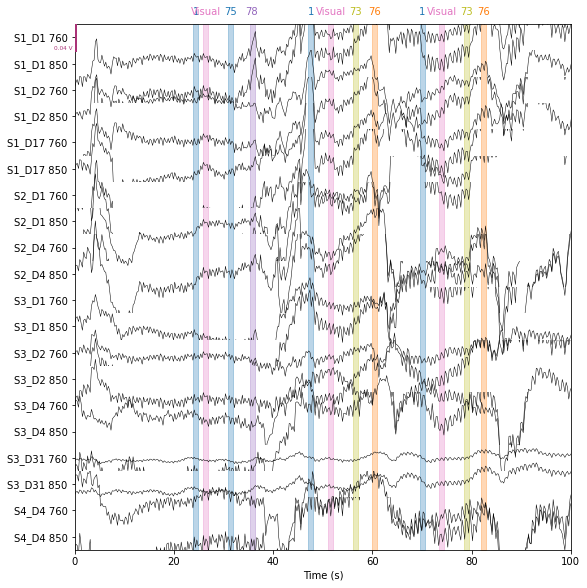

In [42]:
# checking values by plotting. S1_D2 is a bad channel (I know that from the future :-) )
raw_od.plot(n_channels=20,
            duration=100, show_scrollbars=False)


['S8_D3 760', 'S8_D3 850', 'S12_D7 760', 'S12_D7 850', 'S13_D12 760', 'S13_D12 850', 'S15_D12 760', 'S15_D12 850', 'S15_D15 760', 'S15_D15 850', 'S25_D22 760', 'S25_D22 850', 'S26_D26 760', 'S26_D26 850', 'S28_D27 760', 'S28_D27 850', 'S31_D16 760', 'S31_D16 850']


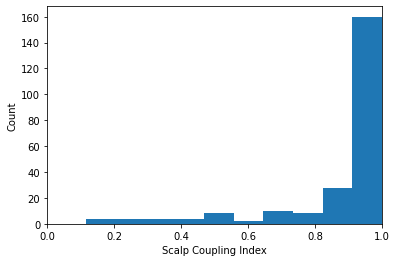

In [58]:
# applying SCI
sci = mne.preprocessing.nirs.scalp_coupling_index(raw_od)

# naming 'bad channels'
raw_od.info['bads'] = list(compress(raw_od.ch_names, sci < 0.5))

# plot SCI per participant
fig, ax = plt.subplots()
ax.hist(sci)
ax.set(xlabel='Scalp Coupling Index', ylabel='Count', xlim=[0, 1])


len(raw_od.info['ch_names'])

print(raw_od.info['bads'])

#len(raw_od.info['chs'])

In [65]:
# can't figure out how to plot the bad short channels, because there should be some 
get_short_channels(raw_od)

<RawSNIRF | 2021-10-28_002.snirf, 32 x 10538 (2761.7 s), ~2.7 MB, data loaded>

In [ ]:
# plot again
raw_od.plot(n_channels=20,
            duration=100, show_scrollbars=False)

In [45]:
#checking number of channels after SCI
len(raw_od.info['ch_names'])

# we still have 200 channels

232

In [46]:
# trying to fix bad channels
raw_od.interpolate_bads(reset_bads = False, method = dict(fnirs = 'nearest'))

##### IT WORKS!!!!!

Interpolating bad channels
    Automatic origin fit: head of radius 97172.5 mm


/var/folders/b0/t62rjb510wb79fxb5ch9n3kc0000gn/T/ipykernel_45218/4014828017.py:2: RuntimeWarning: Estimated head size (97172.5 mm) exceeded 99th percentile for adult head size
/var/folders/b0/t62rjb510wb79fxb5ch9n3kc0000gn/T/ipykernel_45218/4014828017.py:2: RuntimeWarning: (X, Y) fit (80.8, -20852.6) more than 20 mm from head frame origin


<RawSNIRF | 2021-10-28_002.snirf, 232 x 10538 (2761.7 s), ~19.0 MB, data loaded>

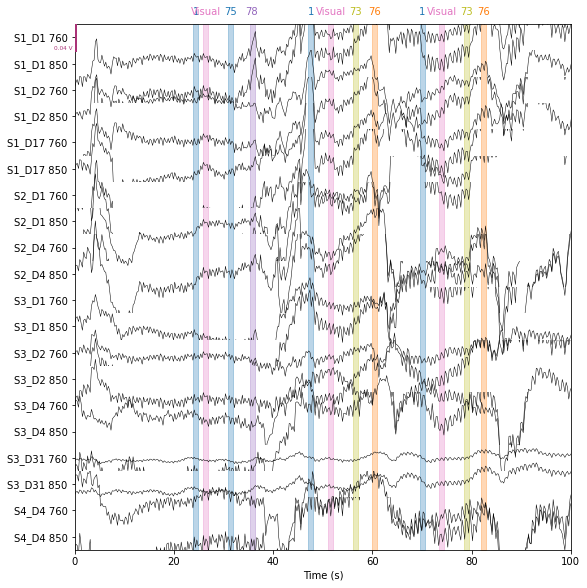

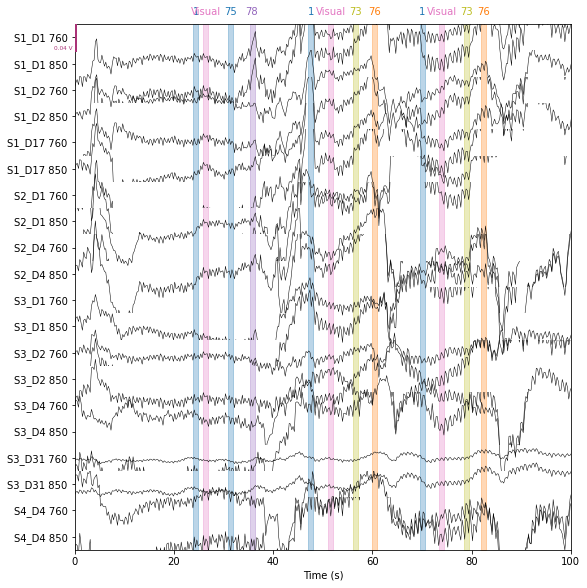

In [47]:
raw_od.plot(n_channels=20,
            duration=100, show_scrollbars=False)

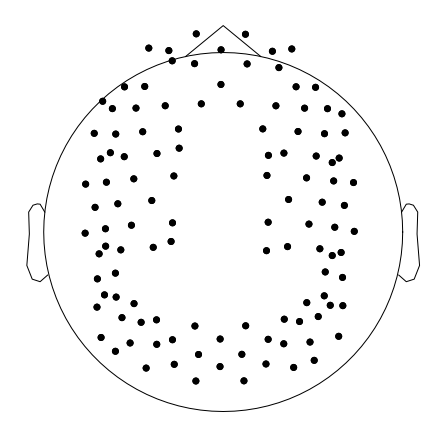

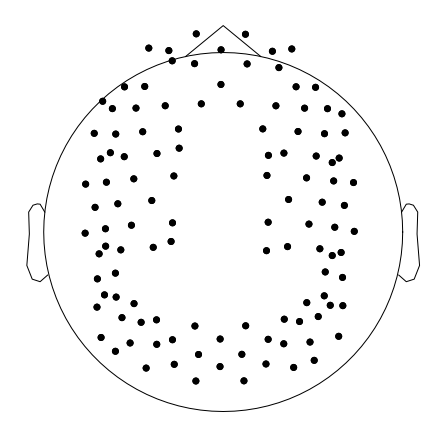

In [48]:
raw_od.plot_sensors()
# no problems here

# Applying short-channel correction

In [ ]:
od_corrected = mne_nirs.signal_enhancement.short_channel_regression(raw_od)
#only works if you don't remove short-channels when applying SCI

## Conclusion ?
So, we still have 200 channels after doing SCI. But, the bad channels have been marked as bad, which influences the plot. So, something is definitively going on behind the scenes. The question is, if it's more than that?

The Github suggests that the bad channels are replaced by the closests good channel. But I don't know if this has been implemented in the general MNE-NIRS functions or if it's a work in progress. 

Read about their discussion on Github here: https://github.com/mne-tools/mne-python/pull/7428 
I have posted a question in the MNE-NIRS forum here: https://mne.discourse.group/t/interpolation-of-bad-channels-in-fnirs-data/4100

# Update: it works
Interpolation works. The fix was to import the files like this:
raw = mne.io.read_raw_snirf(sub, optode_frame="mri")
So "optode_frame = "mri" was added. 

# Update: new problem
So far, we've only applied SCI to the long-channels. But this is problematic, as it removes the short-channels from the dataset and we neeed them to perform short-channel regression. One fix could be to include short-channels in the SCI. When doing that, we have more 'bad' channels, which means that some short-channels are 'bad'. But I cannot get it to print the names of the short-channels (they are not in raw.info['bads']), so I don't know which. 
Also, I don't know how the interpolation functions handles bad short-channels - if it replaces the signal of a bad short-channel with that of a good long-channel - if that's the case, we would have a problem. 

# Epochs function
Make function which helps to decide a threshold for hemoglobin.

We need to make a function which runs trough all subjects and spits out a nice plot, so we can estimate the best criteria for max Hbo values in each epoch (right?)

In [17]:
# write function
def preprocess_epochs(sub, idx, hbo_limit):

    # importing file
    raw = mne.io.read_raw_snirf(sub)

    #renaming triggers
    raw.annotations.rename({'70': 'Visual',
                            '71': 'Visual',
                            '72': 'Visual',
                            '61': 'Auditory',
                            '62': 'Auditory', 
                            '63': 'Auditory'})

    # choosing long channels
    picks = mne.pick_types(raw.info, meg=False, fnirs=True)
    dists = mne.preprocessing.nirs.source_detector_distances(
        raw.info, picks=picks)
    raw.pick(picks[dists > 0.01])

    # converting to optical density
    raw_od = mne.preprocessing.nirs.optical_density(raw)

    # creating SCI
    sci = mne.preprocessing.nirs.scalp_coupling_index(raw_od)

    # naming 'bad channels'
    raw_od.info['bads'] = list(compress(raw_od.ch_names, sci < 0.2))

    # Converting from optical density to haemeoglobin
    raw_haemo = mne.preprocessing.nirs.beer_lambert_law(raw_od, ppf=0.1)

   # applying low- and highpass filters
    raw_haemo = raw_haemo.filter(0.05, 0.7, h_trans_bandwidth=0.2,
                             l_trans_bandwidth=0.02)

    # getting events
    events, event_dict = mne.events_from_annotations(raw_haemo)

    # signals which are unlikely large are removed
    # default 80e-6
    # maybe it should be 250e-6
    reject_criteria = dict(hbo=hbo_limit)
    tmin, tmax = -2, 7 #time

    # getting epochs
    epochs = mne.Epochs(raw_haemo, events, event_id=event_dict,
                        tmin=tmin, tmax=tmax,
                        reject=reject_criteria, reject_by_annotation=True,
                        proj=True, baseline=(None, 0), preload=True,
                        detrend=None, verbose=True) # consider adding event_repeated = something

    # plot number of dropped epochs per subjects
    plot_epoch = epochs.plot_drop_log()

    # save figures
    plot_epoch.savefig('figures_epochs/%d_rejected_epochs.pdf' % idx)

    message = "it works"

    # plot SCI per participant
    #fig, ax = plt.subplots()
    #ax.hist(sci)
    #ax.set(xlabel='Scalp Coupling Index', ylabel='Count', title = "Subject %d" % idx, xlim=[0, 1])

    # save each figure with a meaningful filename
    #print('%d_sci.pdf' % idx)
    #plt.savefig('figures/%d_sci.pdf' % idx)


    return message

# Epochs - for loop

Please note that subject 2 and 10 are still in this list!

In [ ]:
# for loop through the list of subjects
for index, sub in enumerate(subjects):
    # calculate SCI for all subjects and return a df with bad channels and number of bad channels
    tester = preprocess_epochs(
        sub, index, 700e-6
    )


# ANDREAS KIG HER

- Jeg synes, at antallet af rejected epochs varierer enormt meget .. Hvor højt kan vi gå op i vores rejection criteria? 

# TDDR function 

In [74]:
# write function
def preprocess_tddr(sub, idx):

    # importing file
    raw = mne.io.read_raw_snirf(sub, optode_frame="mri")

    #renaming triggers
    raw.annotations.rename({'70': 'Visual',
                            '71': 'Visual',
                            '72': 'Visual',
                            '61': 'Auditory',
                            '62': 'Auditory', 
                            '63': 'Auditory'})

    # choosing long channels
    #picks = mne.pick_types(raw.info, meg=False, fnirs=True)
    #dists = mne.preprocessing.nirs.source_detector_distances(
    #    raw.info, picks=picks)
    #raw.pick(picks[dists > 0.01])

    # converting to optical density
    raw_od = mne.preprocessing.nirs.optical_density(raw)

    # creating SCI
    sci = mne.preprocessing.nirs.scalp_coupling_index(raw_od)

    # naming 'bad channels'
    raw_od.info['bads'] = list(compress(raw_od.ch_names, sci < 0.2))

    # interpolation of bad channels 
    raw_od.interpolate_bads(reset_bads = False, method = dict(fnirs = 'nearest'))
    
    # plot before short-channel regression
    raw_od.plot(duration = 300)

    # short_channel regression
    od_corrected = mne_nirs.signal_enhancement.short_channel_regression(raw_od)

    # plot after short channel regression and before TDDR
    od_corrected.plot(duration = 300)
  
    #n_channels=20, duration=100, show_scrollbars=False

    tddr_raw_od = mne.preprocessing.nirs.tddr(raw_od)

    # plot after TDDR 
    tddr_raw_od.plot(duration = 300)

    message = "it works"

    return message

In [ ]:
# for loop through the list of subjects
for index, sub in enumerate(subjects[:5]):
    # calculate SCI for all subjects and return a df with bad channels and number of bad channels
    tester = preprocess_tddr(
        sub, index
    )

# Conclusion
So, something is happening when we apply short-channel regression and TDDR motion correction, but not sure it's good..
I'll now try the other plots

# Cosistency function - plots
Consistency of hemoglobin across trials and consistency of responses across channels plot per subject


In [105]:
# write function
def preprocess_consistency_check(sub, idx, hbo_limit):

    # importing file
    raw = mne.io.read_raw_snirf(sub, optode_frame = 'mri')

    #renaming triggers
    raw.annotations.rename({'70': 'Visual',
                            '71': 'Visual',
                            '72': 'Visual',
                            '61': 'Auditory',
                            '62': 'Auditory', 
                            '63': 'Auditory'})

    # choosing long channels
    #picks = mne.pick_types(raw.info, meg=False, fnirs=True)
    #dists = mne.preprocessing.nirs.source_detector_distances(
    #    raw.info, picks=picks)
    #raw.pick(picks[dists > 0.01])

    # converting to optical density
    raw_od = mne.preprocessing.nirs.optical_density(raw)

    # creating SCI
    sci = mne.preprocessing.nirs.scalp_coupling_index(raw_od)

    # naming 'bad channels'
    raw_od.info['bads'] = list(compress(raw_od.ch_names, sci < 0.2))

    # interpolation of bad channels 
    raw_od.interpolate_bads(reset_bads = False, method = dict(fnirs = 'nearest'))
    
    # Converting from optical density to haemeoglobin
    raw_haemo = mne.preprocessing.nirs.beer_lambert_law(raw_od, ppf=0.1)

   # applying low- and highpass filters
    raw_haemo = raw_haemo.filter(0.05, 0.7, h_trans_bandwidth=0.2,
                             l_trans_bandwidth=0.02)

    # getting events
    events, event_dict = mne.events_from_annotations(raw_haemo)

    # signals which are unlikely large are removed
    # default 80e-6
    # maybe it should be 250e-6
    reject_criteria = dict(hbo=hbo_limit)
    tmin, tmax = -2, 7 #time

    # getting epochs
    epochs = mne.Epochs(raw_haemo, events, event_id=event_dict,
                        tmin=tmin, tmax=tmax,
                        reject=reject_criteria, reject_by_annotation=True,
                        proj=True, baseline=(None, 0), preload=True,
                        detrend=None, verbose=True) # consider adding event_repeated = something

    # viewing consistency of hemoglobin over trials - quality checking data

    # visual 
    epochs['Visual'].plot_image(combine='mean', vmin=-30, vmax=30,
                             ts_args=dict(ylim=dict(hbo=[-15, 15],
                                                    hbr=[-15, 15])))

    # save fig
    #epo_vis.savefig('figures_consistency/%d_epochs_vis.pdf' % idx)


    # auditory
    epochs['Auditory'].plot_image(combine='mean', vmin=-30, vmax=30,
                             ts_args=dict(ylim=dict(hbo=[-15, 15],
                                                    hbr=[-15, 15])))

    # save fig
    #epo_aud.savefig('figures_consistency/%d_epochs_aud.pdf' % idx)


    # consistency of responses across channels
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 6))
    clims = dict(hbo=[-20, 20], hbr=[-20, 20])
    epochs['Visual'].average().plot_image(axes=axes[:, 0], clim=clims)
    epochs['Auditory'].average().plot_image(axes=axes[:, 1], clim=clims)
    for column, condition in enumerate(['Visual', 'Auditory']):
        for ax in axes[:, column]:
            ax.set_title('{}: {}'.format(condition, ax.get_title()))

    # save fig
    fig.savefig('figures_consistency/subject_%d_channels.pdf' % idx)


    message = "it works"


    return message

Loading /Users/sigridagersnapbomnielsen/Documents/Python/5th_semester/BA_fnirs_code/BA_fNIRS/phase_2_data/NCPE-2021-11-01/NP-Ph2-303-2021-11-01/2021-11-01_001.snirf
Reading 0 ... 8022  =      0.000 ...  2102.566 secs...
Interpolating bad channels
    Automatic origin fit: head of radius 97172.5 mm
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.05 - 0.7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.05
- Lower transition bandwidth: 0.02 Hz (-6 dB cutoff frequency: 0.04 Hz)
- Upper passband edge: 0.70 Hz
- Upper transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Filter length: 631 samples (165.385 sec)

Used Annotations descriptions: ['1', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '5

/var/folders/b0/t62rjb510wb79fxb5ch9n3kc0000gn/T/ipykernel_45218/4179937113.py:31: RuntimeWarning: Estimated head size (97172.5 mm) exceeded 99th percentile for adult head size
/var/folders/b0/t62rjb510wb79fxb5ch9n3kc0000gn/T/ipykernel_45218/4179937113.py:31: RuntimeWarning: (X, Y) fit (80.8, -20852.6) more than 20 mm from head frame origin


    Rejecting  epoch based on HBO : ['S20_D40 hbo']
    Rejecting  epoch based on HBO : ['S20_D40 hbo']
    Rejecting  epoch based on HBO : ['S20_D40 hbo']
    Rejecting  epoch based on HBO : ['S20_D40 hbo']
    Rejecting  epoch based on HBO : ['S20_D40 hbo']
    Rejecting  epoch based on HBO : ['S20_D40 hbo']
    Rejecting  epoch based on HBO : ['S20_D40 hbo']
    Rejecting  epoch based on HBO : ['S20_D40 hbo']
    Rejecting  epoch based on HBO : ['S20_D40 hbo']
    Rejecting  epoch based on HBO : ['S20_D40 hbo']
    Rejecting  epoch based on HBO : ['S20_D40 hbo']
    Rejecting  epoch based on HBO : ['S20_D40 hbo']
    Rejecting  epoch based on HBO : ['S20_D40 hbo']
    Rejecting  epoch based on HBO : ['S20_D40 hbo']
    Rejecting  epoch based on HBO : ['S20_D40 hbo']
    Rejecting  epoch based on HBO : ['S20_D40 hbo']
    Rejecting  epoch based on HBO : ['S20_D40 hbo']
    Rejecting  epoch based on HBO : ['S20_D40 hbo']
22 bad epochs dropped
Not setting metadata
Not setting metadata


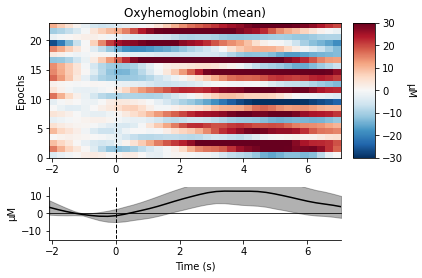

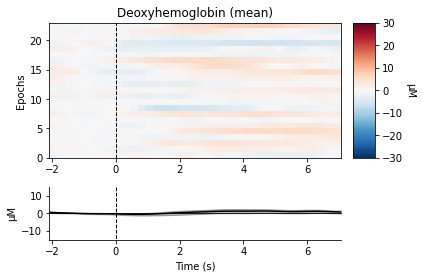

Not setting metadata
Not setting metadata
22 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
22 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "mean"
combining channels using "mean"


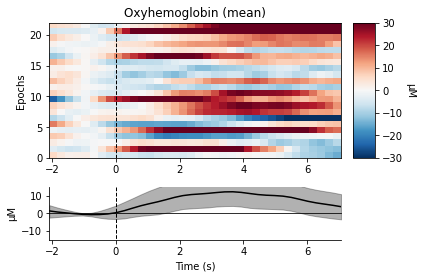

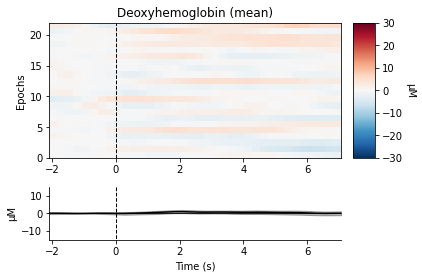

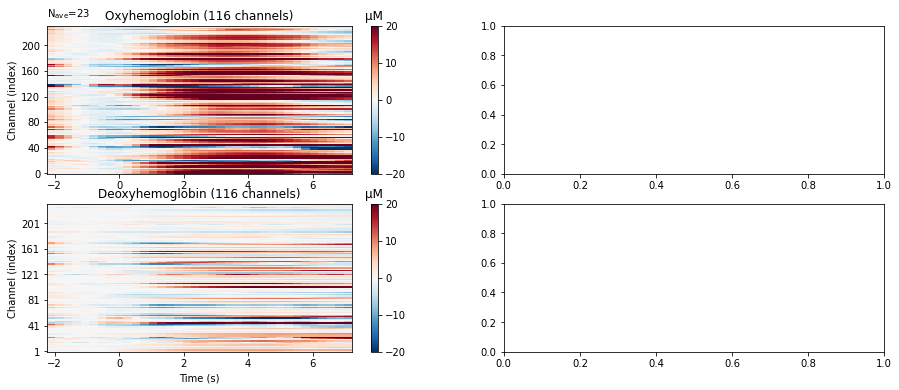

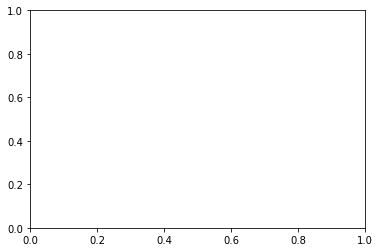

Loading /Users/sigridagersnapbomnielsen/Documents/Python/5th_semester/BA_fnirs_code/BA_fNIRS/phase_2_data/NCPE-2021-11-01/NP-Ph2-304-2021-11-01/2021-11-01_002.snirf
Reading 0 ... 6905  =      0.000 ...  1809.800 secs...
Interpolating bad channels
    Automatic origin fit: head of radius 97172.5 mm
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.05 - 0.7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.05
- Lower transition bandwidth: 0.02 Hz (-6 dB cutoff frequency: 0.04 Hz)
- Upper passband edge: 0.70 Hz
- Upper transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Filter length: 631 samples (165.385 sec)

Used Annotations descriptions: ['1', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '5

/var/folders/b0/t62rjb510wb79fxb5ch9n3kc0000gn/T/ipykernel_45218/4179937113.py:31: RuntimeWarning: Estimated head size (97172.5 mm) exceeded 99th percentile for adult head size
/var/folders/b0/t62rjb510wb79fxb5ch9n3kc0000gn/T/ipykernel_45218/4179937113.py:31: RuntimeWarning: (X, Y) fit (80.8, -20852.6) more than 20 mm from head frame origin


    Rejecting  epoch based on HBO : ['S17_D17 hbo', 'S18_D17 hbo', 'S20_D40 hbo']
    Rejecting  epoch based on HBO : ['S17_D17 hbo', 'S18_D17 hbo', 'S20_D40 hbo']
    Rejecting  epoch based on HBO : ['S17_D17 hbo', 'S18_D17 hbo', 'S20_D40 hbo']
    Rejecting  epoch based on HBO : ['S17_D17 hbo', 'S18_D17 hbo', 'S20_D40 hbo']
    Rejecting  epoch based on HBO : ['S2_D1 hbo']
    Rejecting  epoch based on HBO : ['S2_D1 hbo']
    Rejecting  epoch based on HBO : ['S13_D37 hbo']
    Rejecting  epoch based on HBO : ['S2_D4 hbo', 'S11_D35 hbo', 'S13_D10 hbo', 'S13_D11 hbo', 'S13_D12 hbo', 'S13_D37 hbo', 'S15_D12 hbo', 'S15_D38 hbo']
    Rejecting  epoch based on HBO : ['S11_D35 hbo', 'S13_D10 hbo', 'S13_D11 hbo', 'S13_D12 hbo', 'S13_D37 hbo', 'S15_D12 hbo', 'S15_D38 hbo', 'S28_D45 hbo']
    Rejecting  epoch based on HBO : ['S11_D35 hbo', 'S13_D10 hbo', 'S13_D11 hbo', 'S13_D12 hbo', 'S13_D37 hbo', 'S15_D12 hbo', 'S15_D38 hbo', 'S28_D45 hbo']
    Rejecting  epoch based on HBO : ['S11_D35 hbo',

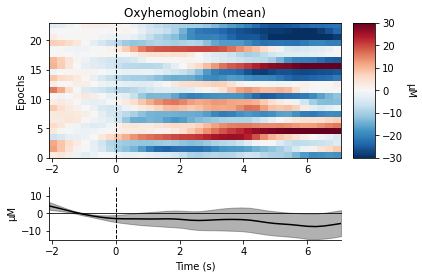

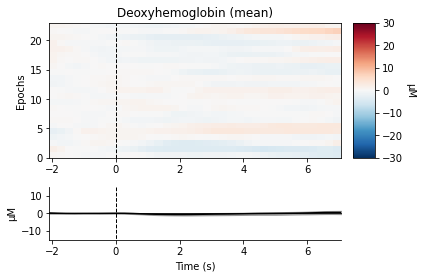

Not setting metadata
Not setting metadata
21 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
21 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "mean"
combining channels using "mean"


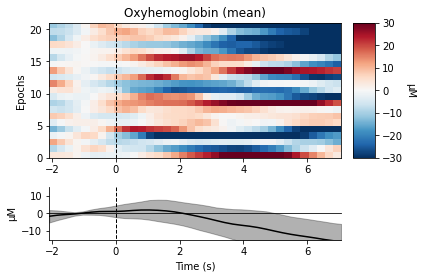

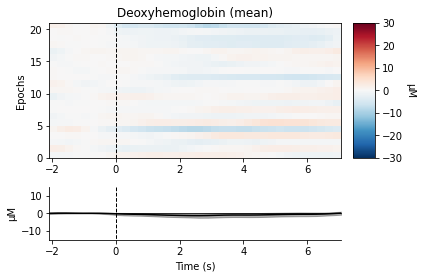

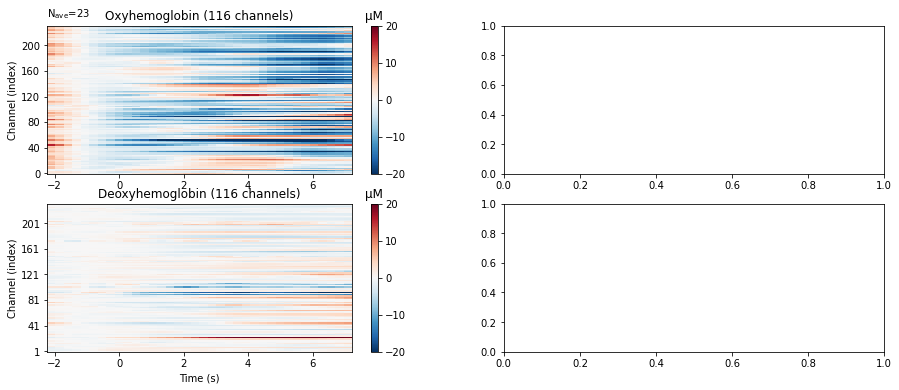

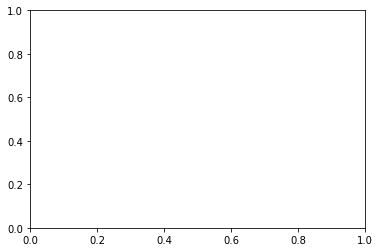

In [106]:
# for loop through the list of subjects
for index, sub in enumerate(subjects[:2]):
    # calculate SCI for all subjects and return a df with bad channels and number of bad channels
    tester = preprocess_consistency_check(
        sub, index, 550e-6
    )

# WALK THROUGH OF PREPROCESSING CODE

In [84]:
# loading data
raw = mne.io.read_raw_snirf(sub, optode_frame = 'mri')

#print(raw.annotations)

Loading /Users/sigridagersnapbomnielsen/Documents/Python/5th_semester/BA_fnirs_code/BA_fNIRS/phase_2_data/NCPE-2021-11-01/NP-Ph2-304-2021-11-01/2021-11-01_002.snirf


In [ ]:
raw.plot(duration = 200)

In [85]:
#help(raw.annotations)
# finding out what we're dealing with
#raw.annotations.description

# renaming visual and auditory contrasts(annotations) - stim triggers
raw.annotations.rename({'70': 'Visual',
                        '71': 'Visual',
                        '72': 'Visual',
                        '61': 'Auditory',
                        '62': 'Auditory', 
                        '63': 'Auditory'})

# check that it worked - alles gut
#raw.annotations.description

<Annotations | 384 segments: 1 (96), 43 (8), 44 (8), 45 (8), 46 (8), 47 ...>

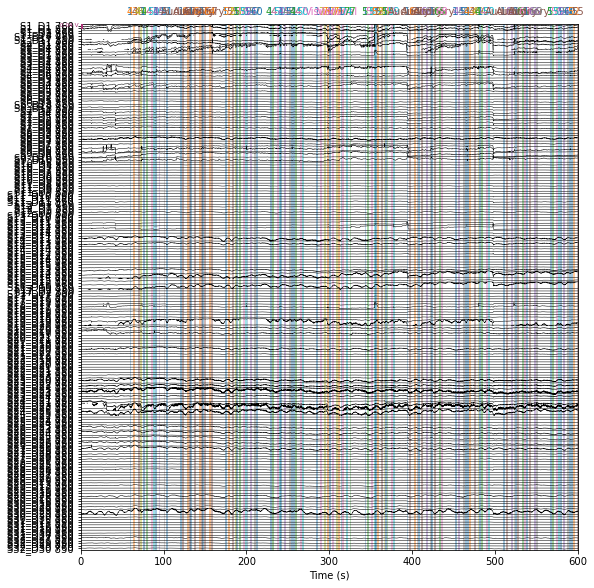

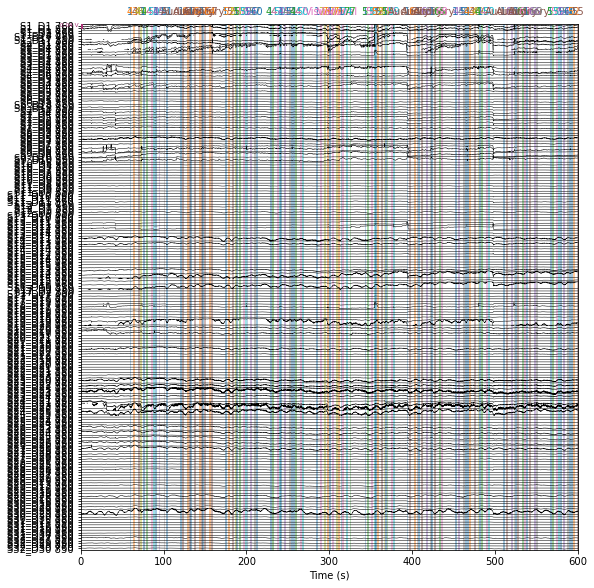

In [86]:
# Selecting channels appropriate for detected neural signals by picking channels that are not short
picks = mne.pick_types(raw.info, meg=False, fnirs=True)
dists = mne.preprocessing.nirs.source_detector_distances(
    raw.info, picks=picks)
raw.pick(picks[dists > 0.01])


raw.plot(n_channels=len(raw.ch_names),
                   duration=600, show_scrollbars=False)

# this dosen't look as nice, because we have many channels compared to the MNE-python tutorial 

Reading 0 ... 6905  =      0.000 ...  1809.800 secs...


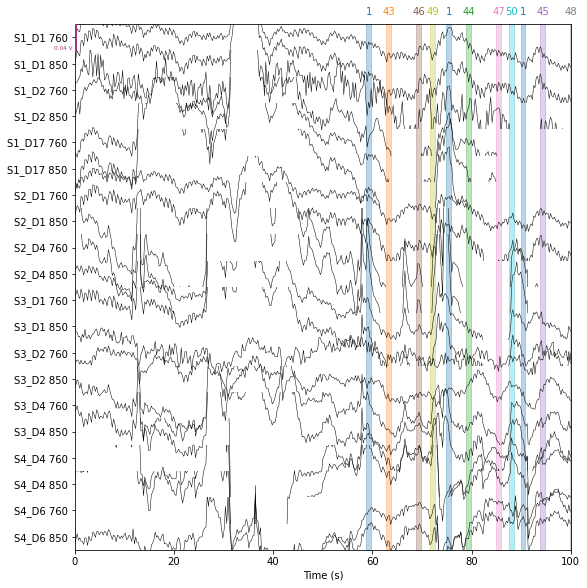

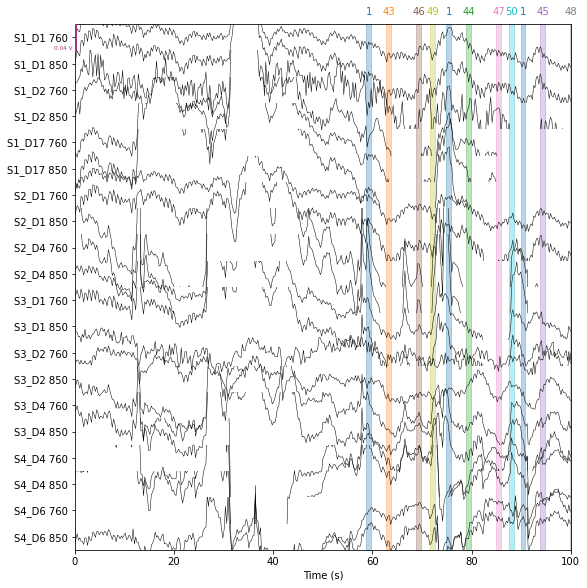

In [87]:
# Converting from raw intensity to optical density
raw_od = mne.preprocessing.nirs.optical_density(raw)


#raw_od.plot(n_channels=len(raw_od.ch_names),
           # duration=500, show_scrollbars=False)

raw_od.plot(n_channels=20,
            duration=100, show_scrollbars=False)            

Evaluating the quality of the data by use of scalp coupling index (SCI)

[Text(0.5, 0, 'Scalp Coupling Index'), Text(0, 0.5, 'Count'), (0.0, 1.0)]

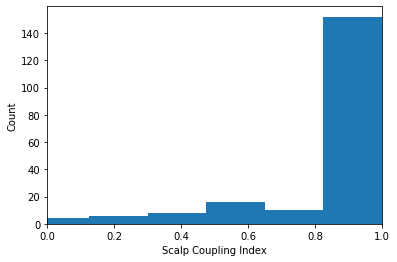

In [88]:
sci = mne.preprocessing.nirs.scalp_coupling_index(raw_od)

fig, ax = plt.subplots()
ax.hist(sci)
ax.set(xlabel='Scalp Coupling Index', ylabel='Count', xlim=[0, 1])

Here, we'll take a liberal approach and only mark channels with SCI <.2 as bad.

In [89]:
raw_od.info['bads'] = list(compress(raw_od.ch_names, sci < 0.5))

In [90]:
# get a list of which channels are bad
print(raw_od.info['bads'])  # print is not stricly necessary, but it won't print when I have another function in the block unless I write print

# count them
len(raw_od.info['bads'])

# 16 channels were bad

['S1_D2 760', 'S1_D2 850', 'S3_D2 760', 'S3_D2 850', 'S14_D11 760', 'S14_D11 850', 'S15_D14 760', 'S15_D14 850', 'S21_D18 760', 'S21_D18 850', 'S22_D19 760', 'S22_D19 850', 'S22_D21 760', 'S22_D21 850', 'S24_D25 760', 'S24_D25 850', 'S28_D27 760', 'S28_D27 850', 'S31_D15 760', 'S31_D15 850', 'S31_D16 760', 'S31_D16 850']


22

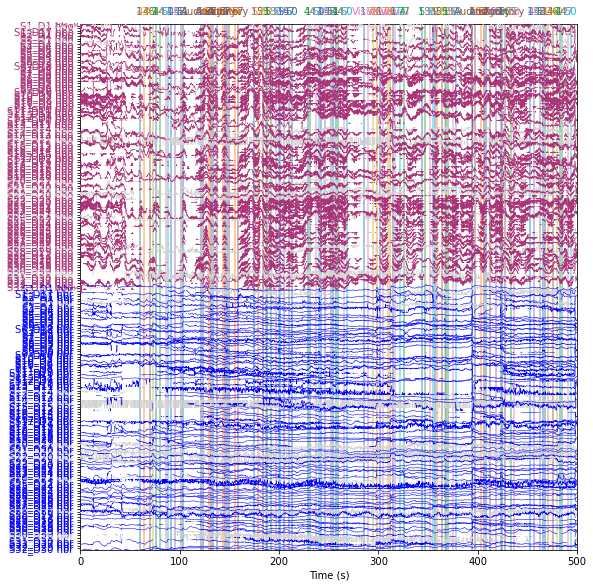

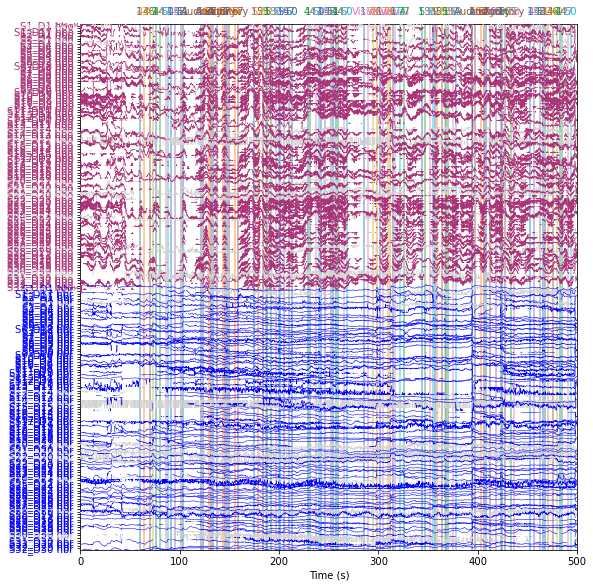

In [91]:
# Converting from optical density to haemeoglobin
raw_haemo = mne.preprocessing.nirs.beer_lambert_law(raw_od, ppf=0.1)

#plot
raw_haemo.plot(n_channels=len(raw_haemo.ch_names),
               duration=500, show_scrollbars=False)

Removing heart rate signal using a lowpass filter of .05. We use a high pass filter of .7 to remove 'slow drifts in the data'.

Frequency window! I would could it a bandpass filter. 

Effective window size : 536.781 (s)
Effective window size : 536.781 (s)


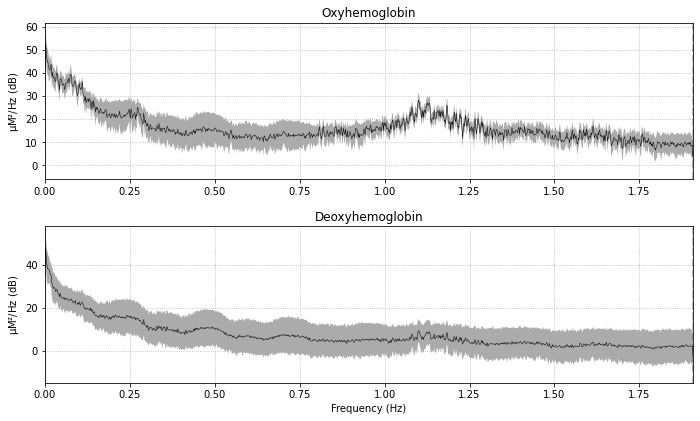

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.05 - 0.7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.05
- Lower transition bandwidth: 0.02 Hz (-6 dB cutoff frequency: 0.04 Hz)
- Upper passband edge: 0.70 Hz
- Upper transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Filter length: 631 samples (165.385 sec)

Effective window size : 536.781 (s)
Effective window size : 536.781 (s)


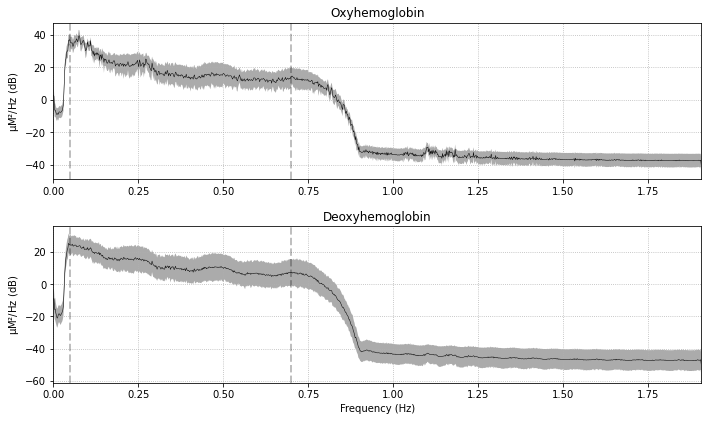

In [92]:
# plot before filtering
fig = raw_haemo.plot_psd(average=True)
fig.suptitle('Before filtering', weight='bold', size='x-large')
fig.subplots_adjust(top=0.88)

# applying low- and highpass filters
raw_haemo = raw_haemo.filter(0.05, 0.7, h_trans_bandwidth=0.2,
                             l_trans_bandwidth=0.02)

# plot after filtering
fig = raw_haemo.plot_psd(average=True)
fig.suptitle('After filtering', weight='bold', size='x-large')
fig.subplots_adjust(top=0.88)

Now, it's epoching time. That is, we extract the epochs which are related to the experimental conditions (visual/auditory stim)

Used Annotations descriptions: ['1', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '64', '65', '66', '67', '68', '69', '73', '74', '75', '76', '77', '78', 'Auditory', 'Visual']


/var/folders/b0/t62rjb510wb79fxb5ch9n3kc0000gn/T/ipykernel_45218/3733951397.py:4: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.


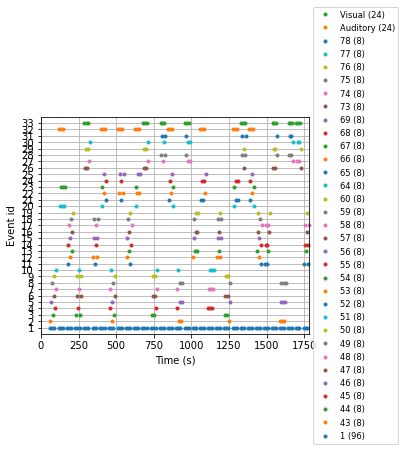

In [93]:
events, event_dict = mne.events_from_annotations(raw_haemo)

#plot
fig = mne.viz.plot_events(events, event_id=event_dict,
                          sfreq=raw_haemo.info['sfreq'])
fig.subplots_adjust(right=0.7)  # make room for the legend

It looks fine, I guess.

Next we define the range of our epochs, the rejection criteria, baseline correction, and extract the epochs. We visualise the log of which epochs were dropped (from tutorial).

Not setting metadata
Not setting metadata
384 matching events found
Setting baseline interval to [-2.0968, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 384 events and 36 original time points ...
    Rejecting  epoch based on HBO : ['S13_D12 hbo']
    Rejecting  epoch based on HBO : ['S13_D12 hbo']
    Rejecting  epoch based on HBO : ['S13_D12 hbo']
    Rejecting  epoch based on HBO : ['S13_D12 hbo']
    Rejecting  epoch based on HBO : ['S13_D12 hbo']
    Rejecting  epoch based on HBO : ['S13_D12 hbo']
    Rejecting  epoch based on HBO : ['S13_D12 hbo']
    Rejecting  epoch based on HBO : ['S13_D12 hbo']
    Rejecting  epoch based on HBO : ['S13_D12 hbo']
    Rejecting  epoch based on HBO : ['S1_D17 hbo']
    Rejecting  epoch based on HBO : ['S1_D17 hbo']
    Rejecting  epoch based on HBO : ['S1_D17 hbo']
    Rejecting  epoch based on HBO : ['S1_D17 hbo']
    Rejecting  epoch based on HBO : ['S1_D1 hbo', 'S1_D17 hbo', 'S2_D1 hbo', 'S3_

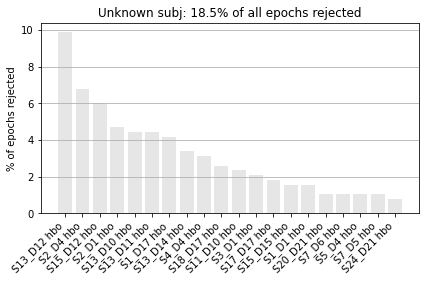

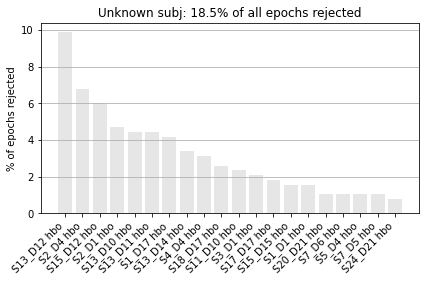

In [94]:
# signals which are unlikely large are removed
# default 80e-6
reject_criteria = dict(hbo=250e-6)
tmin, tmax = -2, 7 #time

# baseline correcting (mean)
epochs = mne.Epochs(raw_haemo, events, event_id=event_dict,
                    tmin=tmin, tmax=tmax,
                    reject=reject_criteria, reject_by_annotation=True,
                    proj=True, baseline=(None, 0), preload=True,
                    detrend=None, verbose=True)

# plotting rejected epochs
epochs.plot_drop_log()

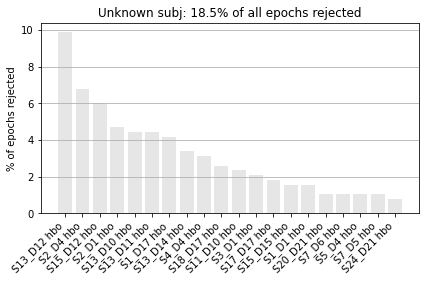

In [16]:
plot_epoch = epochs.plot_drop_log()
plot_epoch.savefig('figures_epochs/0_rejected_epochs.pdf')

In [ ]:
epochs.plot_image()
epochs.plot_projs_topomap()
epochs.plot_psd()

#Interestingly, the channel with the most rejected epochs is not a 'bad' channel..

Consistency of hemoglobin over trials 

In [ ]:
# viewing consistency of hemoglobin over trials - quality checking data

# visual 
test = epochs['Visual'].plot_image(combine='mean', vmin=-30, vmax=30,
                             ts_args=dict(ylim=dict(hbo=[-15, 15],
                                                    hbr=[-15, 15])))
auditory
epochs['Auditory'].plot_image(combine='mean', vmin=-30, vmax=30,
                             ts_args=dict(ylim=dict(hbo=[-15, 15],
                                                    hbr=[-15, 15])))



In [102]:
test
#returns a list, does not work with save fig

AttributeError: 'RawSNIRF' object has no attribute 'savefig'

 Consistency of responses across channels

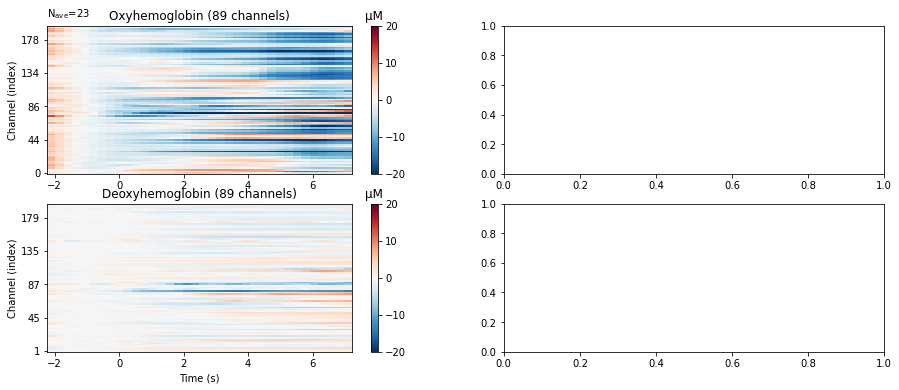

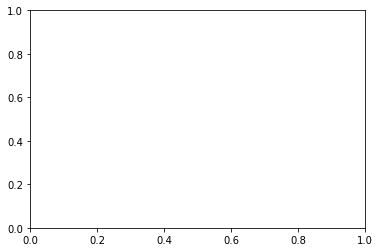

In [96]:
# consistency of responses across channels
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 6))
clims = dict(hbo=[-20, 20], hbr=[-20, 20])
epochs['Visual'].average().plot_image(axes=axes[:, 0], clim=clims)
epochs['Auditory'].average().plot_image(axes=axes[:, 1], clim=clims)
for column, condition in enumerate(['Visual', 'Auditory']):
    for ax in axes[:, column]:
        ax.set_title('{}: {}'.format(condition, ax.get_title()))

I'm not sure how this is supposed to look like..

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


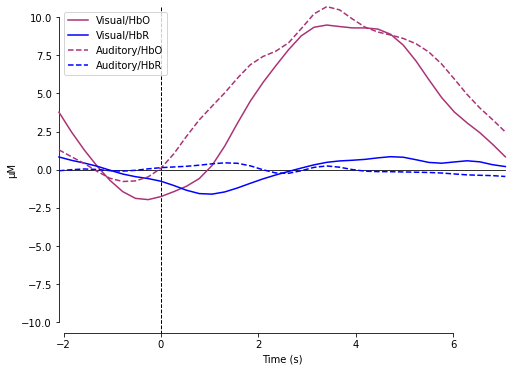

[<Figure size 576x432 with 1 Axes>]

In [20]:
evoked_dict = {'Visual/HbO': epochs['Visual'].average(picks='hbo'),
               'Visual/HbR': epochs['Visual'].average(picks='hbr'),
               'Auditory/HbO': epochs['Auditory'].average(picks='hbo'),
               'Auditory/HbR': epochs['Auditory'].average(picks='hbr')}

# Rename channels until the encoding of frequency in ch_name is fixed
for condition in evoked_dict:
    evoked_dict[condition].rename_channels(lambda x: x[:-4])

color_dict = dict(HbO='#AA3377', HbR='b')
styles_dict = dict(Auditory=dict(linestyle='dashed'))

mne.viz.plot_compare_evokeds(evoked_dict, combine="mean", ci=0.95,
                             colors=color_dict, styles=styles_dict)

Definitively not what it's supposed to look like. 

No projector specified for this dataset. Please consider the method self.add_proj.


ValueError: Times should be between -2.1 and 7.08.

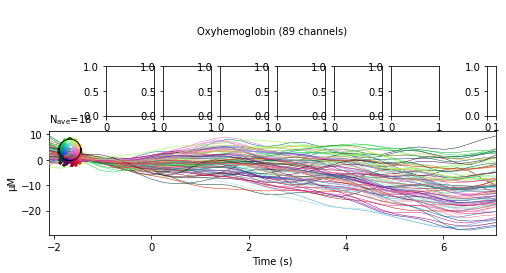

In [48]:
# Topographic representation of activity
times = np.arange(-3.5, 13.2, 3.0)
topomap_args = dict(extrapolate='local')
epochs['Visual'].average(picks='hbo').plot_joint(
    times=times, topomap_args=topomap_args)

Effective window size : 536.781 (s)


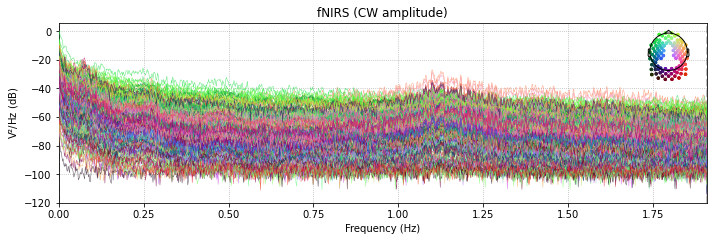

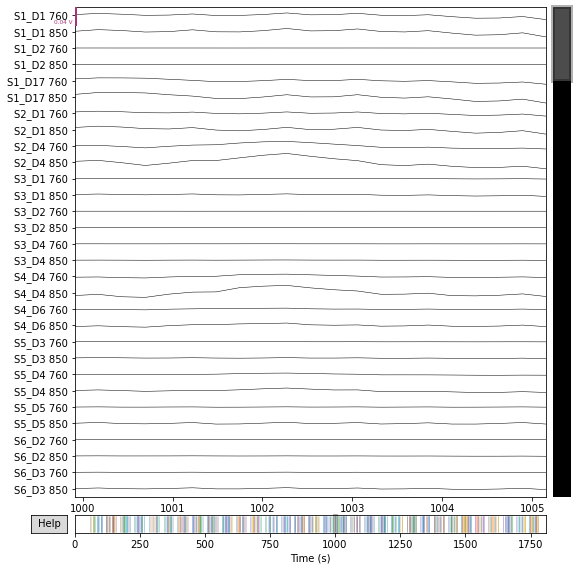

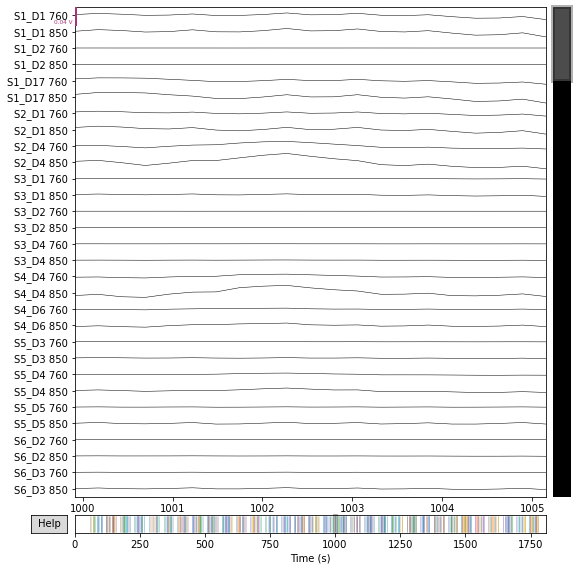

In [49]:
# voltage frequency plot ? heart rate is visible at about 1.1 Hz
raw.plot_psd()

# another plot 
raw.plot(duration=5, n_channels=30, start = 1000)

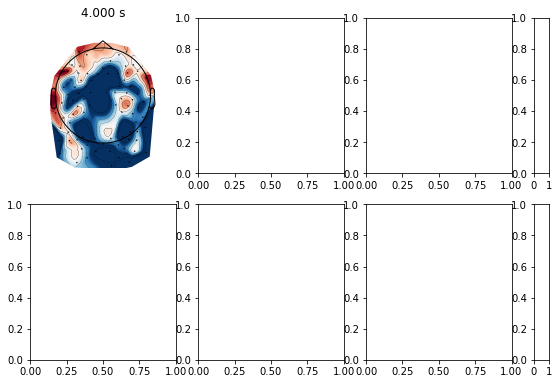

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [50]:
# another plot

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(9, 5),
                         gridspec_kw=dict(width_ratios=[1, 1, 1, 0.1]))
vmin, vmax, ts = -8, 7, 4

evoked_vis = epochs['Visual'].average()
evoked_aud = epochs['Auditory'].average()

evoked_vis.plot_topomap(ch_type='hbo', times=ts, axes=axes[0, 0],
                         vmin=vmin, vmax=vmax, colorbar=False,
                         **topomap_args)
evoked_vis.plot_topomap(ch_type='hbr', times=ts, axes=axes[1, 0],
                         vmin=vmin, vmax=vmax, colorbar=False,
                         **topomap_args)
evoked_aud.plot_topomap(ch_type='hbo', times=ts, axes=axes[0, 1],
                          vmin=vmin, vmax=vmax, colorbar=False,
                          **topomap_args)
evoked_aud.plot_topomap(ch_type='hbr', times=ts, axes=axes[1, 1],
                          vmin=vmin, vmax=vmax, colorbar=False,
                          **topomap_args)

evoked_diff = mne.combine_evoked([evoked_vis, evoked_aud], weights=[1, -1])

evoked_diff.plot_topomap(ch_type='hbo', times=ts, axes=axes[0, 2:],
                         vmin=vmin, vmax=vmax, colorbar=True,
                         **topomap_args)
evoked_diff.plot_topomap(ch_type='hbr', times=ts, axes=axes[1, 2:],
                         vmin=vmin, vmax=vmax, colorbar=True,
                         **topomap_args)

for column, condition in enumerate(
        ['Visual', 'Auditory']):
    for row, chroma in enumerate(['HbO', 'HbR']):
        axes[row, column].set_title('{}: {}'.format(chroma, condition))
fig.tight_layout()